<a href="https://colab.research.google.com/github/sthirupalreddy/Christmas-project-main.1/blob/main/FUZZY_C_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


In [ ]:
from fcmeans import FCM # Now import

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv("/content/IRIS (2).csv")


In [ ]:
# Select features for clustering (numerical features)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = data[features]

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Determine optimal k using silhouette score (for comparison with KMeans)
k_values = range(2, 10)  # Test k values from 2 to 9
silhouette_scores = []


In [ ]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)


In [ ]:
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (based on silhouette score for KMeans): {optimal_k}")


Optimal number of clusters (based on silhouette score for KMeans): 2


In [ ]:
# Fuzzy C-Means Clustering
fcm = FCM(n_clusters=optimal_k) # Using the same optimal k found for KMeans
fcm.fit(X_scaled)


In [ ]:
# Get cluster labels
data['cluster_fcm'] = fcm.predict(X_scaled)


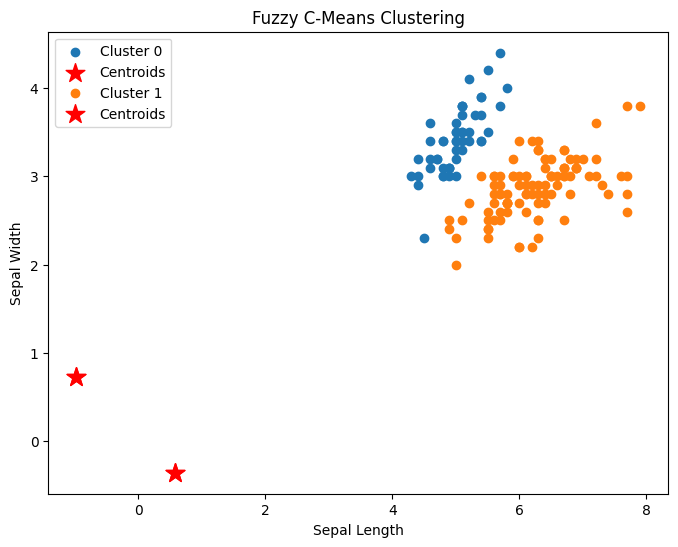

In [ ]:
# Plot the clusters (Fuzzy C-Means)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['cluster_fcm'] == cluster]
    plt.scatter(cluster_data['sepal_length'], cluster_data['sepal_width'], label=f'Cluster {cluster}')
    plt.scatter(fcm.centers[:, 0], fcm.centers[:, 1], s=200, c='red', marker='*', label='Centroids') # Use fcm.centers for centroids
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Fuzzy C-Means Clustering')
plt.legend()
plt.show()

